# SR-Adam Quick Launcher

This notebook is a minimal launcher for running SR-Adam experiments. For detailed documentation, see README.md and QUICK_START.md.

**Quick Reference:**
- Run examples below or modify parameters as needed
- Use `--dataset ALL` to test on both CIFAR10 and CIFAR100
- Use `--noise ALL` to test all noise levels [0.0, 0.05, 0.1]
- Use `--optimizers ALL` to compare all optimization methods
- Results are saved to `results/` and checkpoints to `runs/`

In [ ]:
import os
if 'google.colab' in str(get_ipython()):
    if not os.path.exists('/content/SR-Adam'):
        !git clone https://github.com/mamintoosi-papers-codes/SR-Adam.git
    %cd /content/SR-Adam
    !pip install -r requirements-cpu.txt

In [ ]:
# Example: Single dataset, specific noise level, and optimizers
# Runs Adam and SR-Adam on CIFAR10 with noise=0.1 for 5 runs
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.1 \
  --optimizers "adam|sradam" \
  --clean_previous

In [ ]:
# Full experimental sweep: all datasets, all noise levels, all optimizers
# Runs: 2 datasets × 3 noise levels × 4 optimizers × 5 runs = 120 runs total
# This takes approximately 30+ hours on GPU
%run main.py \
  --dataset ALL \
  --model simplecnn \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise ALL \
  --optimizers ALL \
  --clean_previous

In [ ]:
# Generate qualitative comparison figures (prediction visualizations)
# Shows sample predictions from best runs for visual comparison
# Adjust seeds to explore different sample sets
%run tools/generate_qualitative_comparison.py --dataset CIFAR10  --noise 0.05 --seed 1000
%run tools/generate_qualitative_comparison.py --dataset CIFAR100 --noise 0.05 --seed 2026

In [ ]:
# 1. Run experiments with multiple batch sizes
%run main.py \
  --dataset CIFAR10 \
  --noise 0.05 \
  --batch_size "64|128|256|1024" \
  --optimizers "adam|sradam" \
  --num_runs 3

In [ ]:
# 2. Aggregate and generate tables
%run tools/regenerate_aggregates.py --batch_size "256|512|2048"
%run tools/make_minimal_tables.py --batch_size "256|512|2048" --output paper_figures/ablation.tex

## Advanced: Filtering Results

After running experiments, you can selectively process results with filters:

### Aggregate Specific Results

In [2]:
# Only batch_size=512
%run tools/regenerate_aggregates.py --batch_size 512


Regenerating Aggregated Results
Datasets:    ['CIFAR10', 'CIFAR100']
Noise:       [0.0, 0.05, 0.1]
Batch sizes: [512]
Optimizers:  ALL
Model:       simplecnn


Processed 0 optimizer configurations



In [ ]:
# Only CIFAR10, noise=0.05
%run tools/regenerate_aggregates.py --dataset CIFAR10 --noise 0.05


In [1]:
# Standard table (batch_size=512)
%run tools/make_minimal_tables.py --batch_size 512

# # Ablation table
# %run tools/make_minimal_tables.py --batch_size "64|128|256|512|1024" --output paper/ablation-bs.tex

# # Compare only Adam vs SR-Adam
# %run tools/make_minimal_tables.py --optimizers "Adam|SR-Adam" --batch_size 512

Wrote c:\git\mamintoosi-papers-codes\SR-Adam\tools\..\paper\minimal-tables_bs512.tex
Wrote c:\git\mamintoosi-papers-codes\SR-Adam\tools\..\paper\minimal-tables-content_bs512.tex

Generating LaTeX Tables
Datasets:    ['CIFAR10', 'CIFAR100']
Noise:       [0.0, 0.05, 0.1]
Batch sizes: [512]
Optimizers:  ALL
Output:      paper_figures/minimal-tables-content.tex

✓ Saved: paper_figures/minimal-tables-content.tex



FileNotFoundError: missing aggregated_epoch_stats: c:\git\mamintoosi-papers-codes\SR-Adam\tools\results\CIFAR10\simplecnn\noise_0.1\Adam\batch_size_512\aggregated_epoch_stats.csv

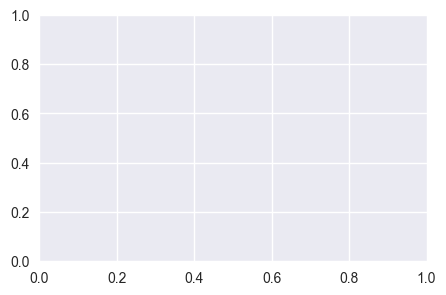

In [3]:
%run tools/make_figures.py --batch_size 512